<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Install Tensorflow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

2.9.0


In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


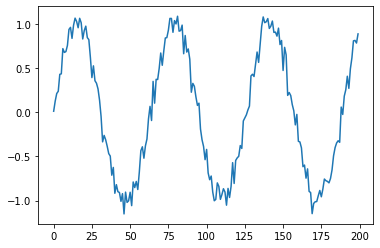

In [14]:
#Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
#plot it
plt.plot(series)
plt.show()

In [15]:
#build the dataset
#let's see if we can use T past values to predict the next value
T=10
X=[]
Y=[]
for t in range (len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1, T)
Y=np.array(Y)
N=len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [16]:
### Autoregressive linear model
i = Input(shape=(T,))
x=Dense(1)(i)
model = Model(i,x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
  )

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 70ms/step - loss: 0.5272 - val_loss: 0.4079
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.3580 - val_loss: 0.1296
Epoch 3/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1473 - val_loss: 0.1547
Epoch 4/80
3/3 [==============================] - 0s 23ms/step - loss: 0.1579 - val_loss: 0.0439
Epoch 5/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0617 - val_loss: 0.0970
Epoch 6/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0954 - val_loss: 0.0491
Epoch 7/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0569 - val_loss: 0.0990
Epoch 8/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0822 - val_loss: 0.0623
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0485 - val_loss: 0.0536
Epoch 10/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0584 - val_loss: 0.0417
Epoch 11/80
3/3 [=======================

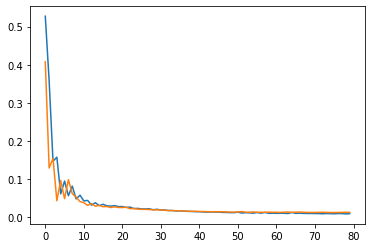

In [17]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

In [18]:
#"wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions=[]

#index of first validation input
i=-N//2
while len(validation_predictions)<len(validation_target):
  p=model.predict(X[i].reshape(1, -1))[0, 0] #1x1 array -> scalar
  i += 1
  #update the prediction list
  validation_predictions.append(p)

1/1 [==============================] - 0s 17ms/step


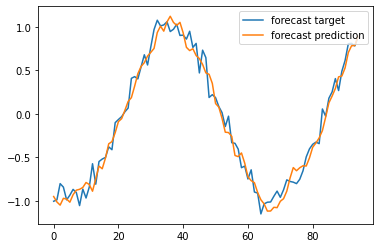

In [19]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [20]:
#forecasting future values(use only self -predictions for making future predictions)
validation_target=Y[-N//2:]
validation_predictions = []
#last train input
last_x = X[-N//2] #1-D array
while len(validation_predictions)<len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] #1x1 array ->scalar
  #update the prediction list
  validation_predictions.append(p)
  #make the new input
  last_x=np.roll(last_x, -1)
  last_x[-1]=p


1/1 [==============================] - 0s 18ms/step


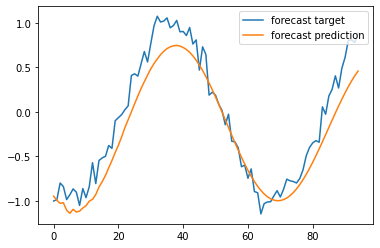

In [21]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()